----

PROJECT DESCRIPTION

The group project is based on the Titanic shipwreck dataset and aims to explore various visualizations and models to predict the chances of survival of a person based on their attributes. The dataset contains information about the passengers, including their age, gender, class, fare, and whether or not they survived the disaster.

The project involves several visualizations of the dataset, including bar charts, histograms, and scatterplots. These visualizations aim to provide insights into the data and to identify any patterns or correlations between the different attributes and survival rates.

In addition to the visualizations, the project also involves building a Linear Classifier model to predict the chances of survival of a person based on their attributes. The model takes into account the passenger's age, gender, class, fare, and whether or not they were traveling alone. The model is trained on a subset of the data and is then used to predict the survival outcomes of the remaining passengers.

Finally, the project compares the actual outcomes with the predicted outcomes using various metrics such as accuracy, precision, and recall. This comparison aims to evaluate the performance of the Linear Classifier model and to identify any areas for improvement.

Overall, the group project provides a comprehensive exploration of the Titanic shipwreck dataset and showcases various techniques and tools in Python for data analysis and prediction. The project also highlights the importance of data visualization and model evaluation in data science and machine learning.

--------

Importing Libraries

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
from tensorflow.python.tpu import feature_column_v2 as fc
import tensorflow as tf

----------

Loading Datasets

In [4]:
data_url = './datasets/train.csv'
data = pd.read_csv(data_url)

-------------

Details about the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            5643 non-null   int64  
 1   sex                 5643 non-null   object 
 2   age                 5643 non-null   float64
 3   n_siblings_spouses  5643 non-null   int64  
 4   parch               5643 non-null   int64  
 5   fare                5643 non-null   float64
 6   class               5643 non-null   object 
 7   deck                5643 non-null   object 
 8   embark_town         5643 non-null   object 
 9   alone               5643 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 441.0+ KB


-----------------

SURVIVAL RATE BY SEX (calculates the count of survived individuals for each sex)

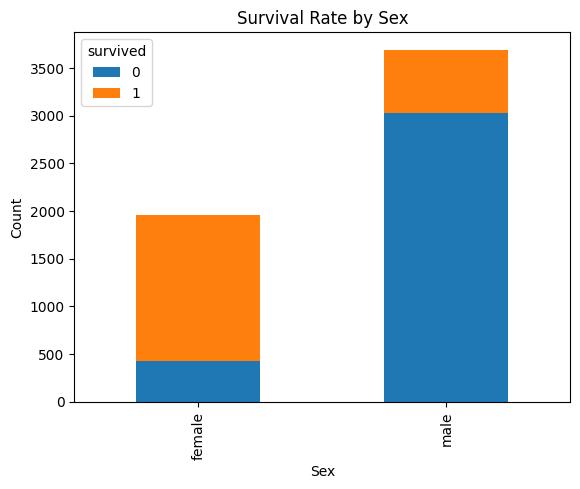

In [6]:
sex_counts = data.groupby(['sex', 'survived'])['survived'].count().unstack()
sex_counts.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()

---------

SURVIVAL RATE BY CLASS (calculates the count of survived individuals for each class)

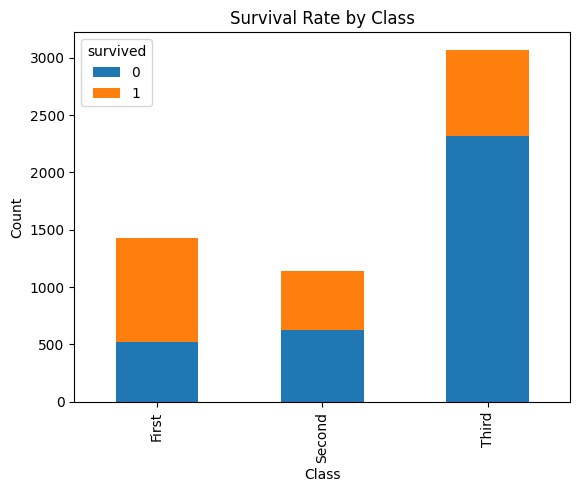

In [7]:
class_counts = data.groupby(['class', 'survived'])['survived'].count().unstack()
class_counts.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()


------

Age distribution

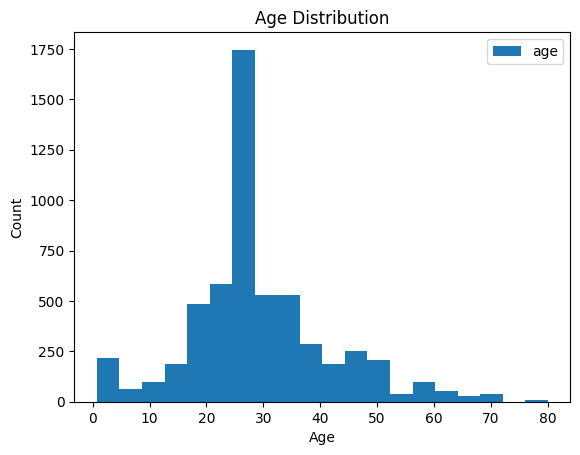

In [8]:

data['age'].plot(kind='hist', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

----

Fare distribution

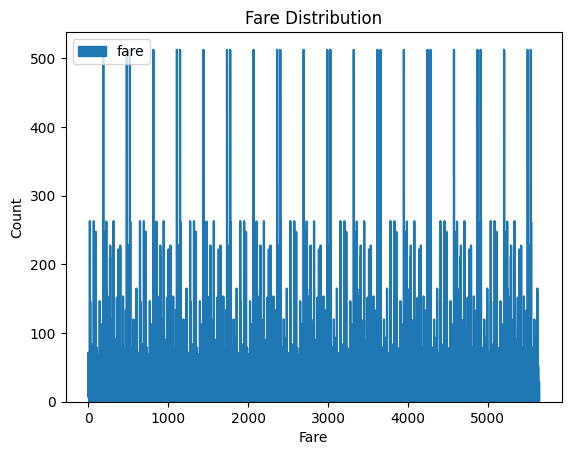

In [9]:
data['fare'].plot(kind='area')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

----

SURVIVAL RATE BY DECL (calculates the count of survived individuals for each deck)

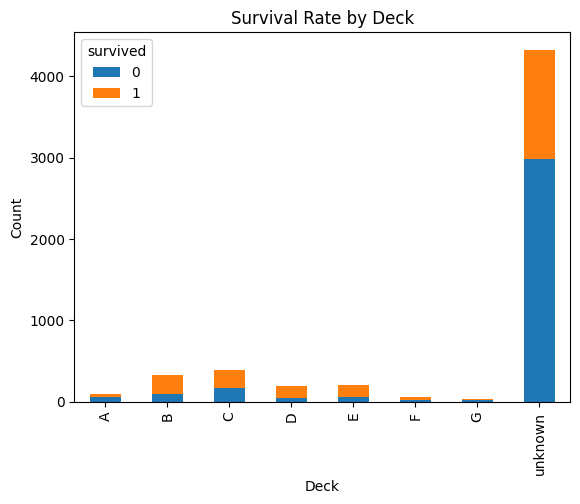

In [10]:
deck_counts = data.groupby(['deck', 'survived'])['survived'].count().unstack()
deck_counts.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.show()

----

SURVIVAL RATE BY EMBARK TOWN (calculates the count of survived individuals for each embark town)

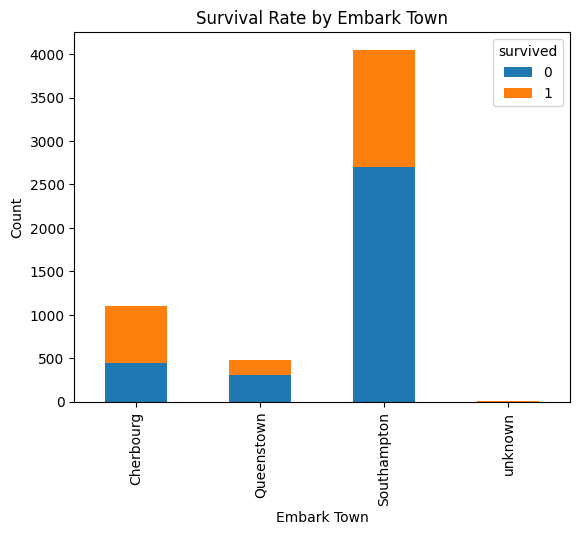

In [11]:
embark_counts = data.groupby(['embark_town', 'survived'])['survived'].count().unstack()
embark_counts.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Embark Town')
plt.xlabel('Embark Town')
plt.ylabel('Count')
plt.show()

----

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_24584\2545967241.py:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


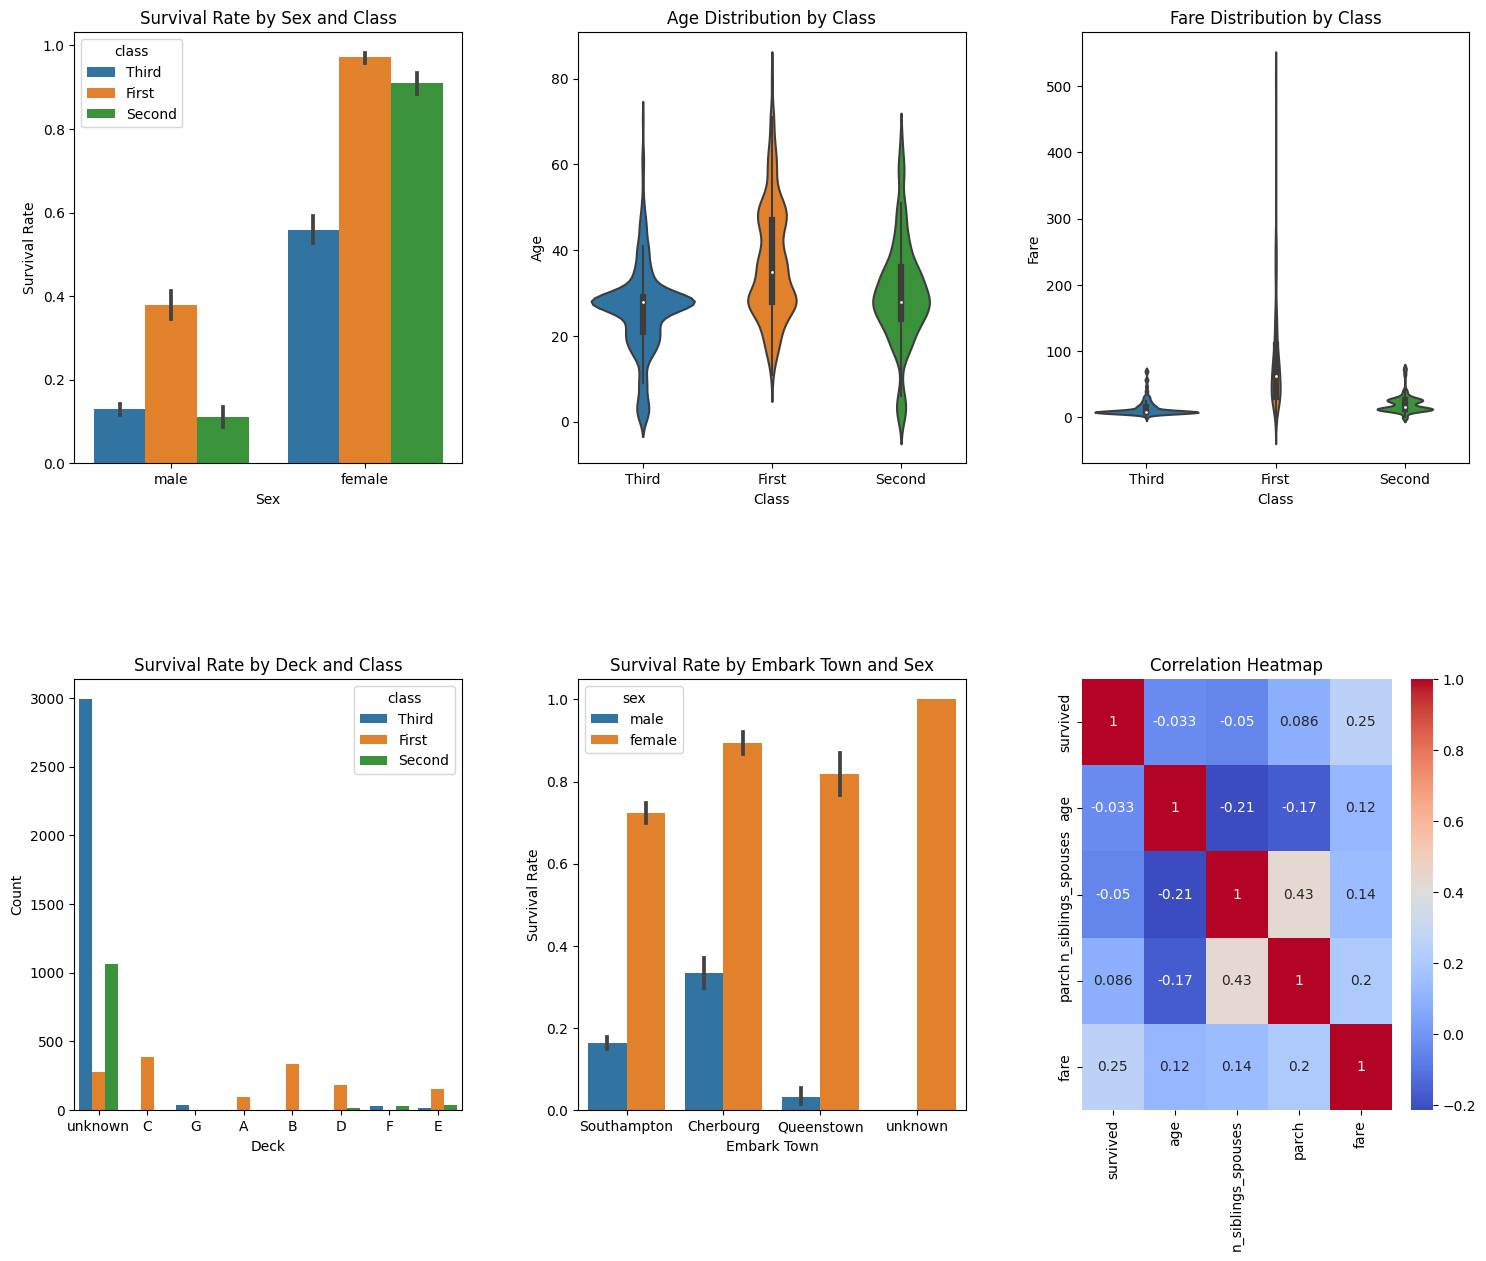

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 14))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
# Create the first plot (Survival rate by sex and class)
sns.barplot(x='sex', y='survived', hue='class', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Survival Rate by Sex and Class')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Survival Rate')

# Create the second plot (Age and fare distribution by class)
sns.violinplot(x='class', y='age', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Class')
axes[0, 1].set_xlabel('Class')
axes[0, 1].set_ylabel('Age')

sns.violinplot(x='class', y='fare', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Fare Distribution by Class')
axes[0, 2].set_xlabel('Class')
axes[0, 2].set_ylabel('Fare')

# Create the third plot (Survival rate by deck and class)
sns.countplot(x='deck', hue='class', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Survival Rate by Deck and Class')
axes[1, 0].set_xlabel('Deck')
axes[1, 0].set_ylabel('Count')

# Create the fourth plot (Survival rate by embark town and sex)
sns.barplot(x='embark_town', y='survived', hue='sex', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Survival Rate by Embark Town and Sex')
axes[1, 1].set_xlabel('Embark Town')
axes[1, 1].set_ylabel('Survival Rate')

# Create the fifth plot (Correlation heatmap)
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, ax=axes[1, 2])
axes[1, 2].set_title('Correlation Heatmap')

plt.show()

----

AGE DISTRIBUTION BY SURVIVAL STATUS

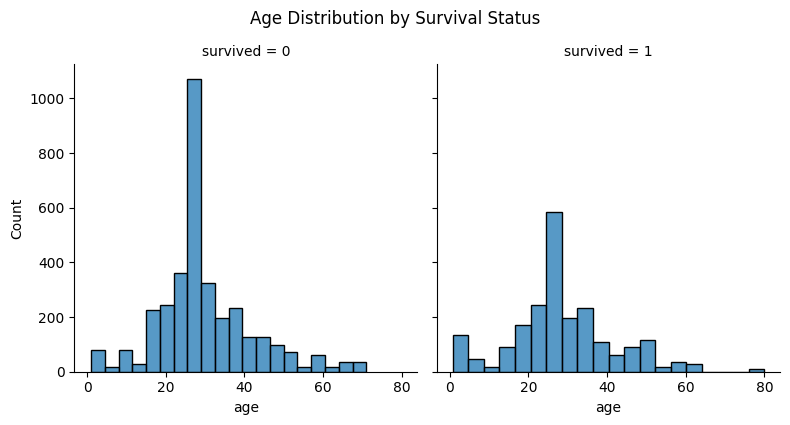

In [13]:
g = sns.FacetGrid(data, col='survived', height=4, aspect=1)
g.map(sns.histplot, 'age', bins=20)
g.fig.suptitle('Age Distribution by Survival Status', y=1.05)

plt.show()

----

FARE DISTRIBUTION BY SURVIVAL STATUS

Text(0.5, 1.05, 'Fare Distribution by Survival Status')

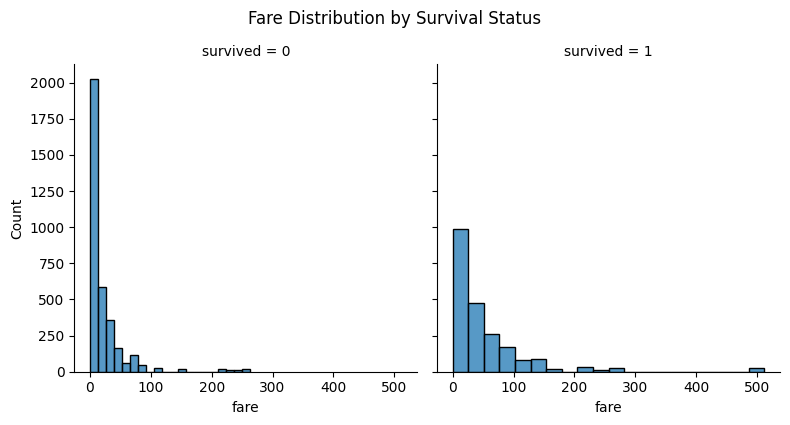

In [14]:
g = sns.FacetGrid(data, col='survived', height=4, aspect=1)
g.map(sns.histplot, 'fare', bins=20)
g.fig.suptitle('Fare Distribution by Survival Status', y=1.05)

----

Now working on the Prediction Model,

Reading the training dataset and the evaluation dataset

In [15]:
dftrain = pd.read_csv('datasets/train.csv')
dfeval = pd.read_csv('datasets/eval.csv')

About the datasets

In [16]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            5643 non-null   int64  
 1   sex                 5643 non-null   object 
 2   age                 5643 non-null   float64
 3   n_siblings_spouses  5643 non-null   int64  
 4   parch               5643 non-null   int64  
 5   fare                5643 non-null   float64
 6   class               5643 non-null   object 
 7   deck                5643 non-null   object 
 8   embark_town         5643 non-null   object 
 9   alone               5643 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 441.0+ KB


In [29]:
dfeval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 264 non-null    object 
 1   age                 264 non-null    float64
 2   n_siblings_spouses  264 non-null    int64  
 3   parch               264 non-null    int64  
 4   fare                264 non-null    float64
 5   class               264 non-null    object 
 6   deck                264 non-null    object 
 7   embark_town         264 non-null    object 
 8   alone               264 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 18.7+ KB


In [17]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [18]:
dfeval.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


Seperating the "survived" column from the dataset and storing it differently

In [19]:
y_train=dftrain.pop('survived')
y_eval=dfeval.pop('survived')

In [20]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [21]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


Making the Categorical Columns (typically used for grouping, filtering, and counting data) and Numberic Columns (for mathematical operations such as addition, subtraction, multiplication, and division)

In [22]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck','embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

Adding the different types of unique values the columns can have (e.g. the "gender" column can have only "Male" and "Female" values)

In [23]:
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

Creating a function to prepare data for use in a machine learning model. The make_input_fn function returns another function called input_function, which can be used as an input for a machine learning model. This input_function takes the original data table and label column, and turns them into a TensorFlow dataset that can be used for training a model.

In [24]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) 
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs) 
    return ds 
  return input_function

In [25]:
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

Providing the input functions to the Linear Classifier 

In [26]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn) 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ADITYA\\AppData\\Local\\Temp\\tmplzfsay3y', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_

Printing the accuracy of the model

In [27]:
print(result )
print(result['accuracy'])

{'accuracy': 0.75757575, 'accuracy_baseline': 0.625, 'auc': 0.8183043, 'auc_precision_recall': 0.7661626, 'average_loss': 0.5162407, 'label/mean': 0.375, 'loss': 0.5048235, 'precision': 0.72727275, 'prediction/mean': 0.2945651, 'recall': 0.56565654, 'global_step': 1770}
0.75757575


Checking it on a random person from the evaluation dataset

In [28]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[5])
print("Survival Status: ",y_eval.loc[5])
print("Predicted chances of survival: ",result[5]['probabilities'][1]*100," %")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADITYA\AppData\Local\Temp\tmplzfsay3y\model.ckpt-1770
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                       female
age                         15.0
n_siblings_spouses             0
parch                          0
fare                      8.0292
class                      Third
deck                     unknown
embark_town           Queenstown
alone                          y
Name: 5, dtype: object
Survival Status:  1
Predicted chances of survival:  73.442143201828  %
